# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

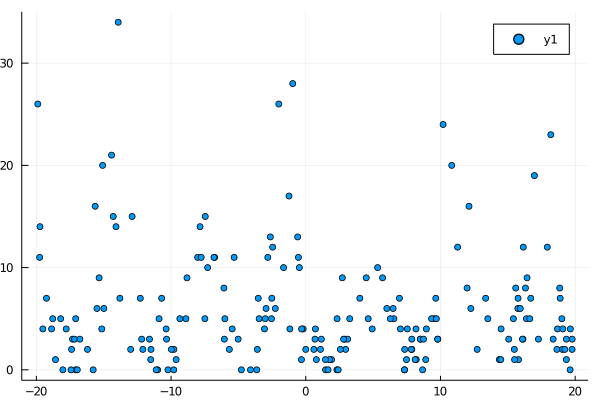

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -541.8371526054226
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.889277 seconds (7.47 M allocations: 475.793 MiB, 98.24% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.191694491639234, 0.23631075516470393, 0.31504832922226883, 0.14250095032148485, 0.473163307287788, 0.16801659586781212, 0.3868872527800821, 0.48904643217269084, 0.4351094658192416, 0.3321910136061991  …  0.21165629498854074, 0.3204833829852939, 0.4562440890907002, 0.31169119076042046, 0.2273868210694591, 0.16620114689284854, 0.27215176759975784, 0.3856998415680861, 0.4264137851304808, 0.4692566150290034], θ = [3.4893214283081457, 4.976861381789741, 8.926289938864548, 5.490711705452665, 9.326639116180951, 4.98827078642452, 2.469276101704816, 7.844278990718465, 2.4612909575507036, 3.4681655792311554  …  3.4869920740350775, 5.949167238106696, 5.406538935538, 4.959909688650981, 3.982853726819076, 4.489669975543151, 5.46630238016015, 2.469461644961725, 3.4479135019683094, 3.437157915490956]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple()

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -706.019443196742
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.039978 seconds (4.39 M allocations: 310.213 MiB, 11.06% gc time, 96.75% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 12.685953055595725) infered by Analytic Variational Inference , (local_vars = (c = [0.2146072901357442, 0.22087326584976294, 0.25920538530222387, 0.2285318655043004, 0.46511475392815865, 0.22495671641931195, 0.5612625506607327, 0.4852694431274155, 0.6109072540465701, 0.4559244410439804  …  0.3449961652732803, 0.46768323735846706, 0.45024844821412974, 0.4464835143805685, 0.16310261511981952, 0.15774170420485403, 0.20966159293861708, 0.5598643404810024, 0.6035411828433582, 0.6516774574183972], θ = [4.332355832122242, 5.714300418572128, 9.260551031768463, 6.435395463479422, 9.312505837753648, 5.893289614334969, 3.8942150970839675, 7.796093222512108, 3.9375454369121328, 4.6772163227992944  …  4.60448896538954, 7.204402082179022, 5.4140732564670895, 6.178784170258967, 4.567628298342984, 5.251544882390235, 5.998498262302821, 3.892553671127254, 4.891889071098981, 4.960254469887958], γ = [6.697941537248531, 6.475025127381987, 5.62468

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

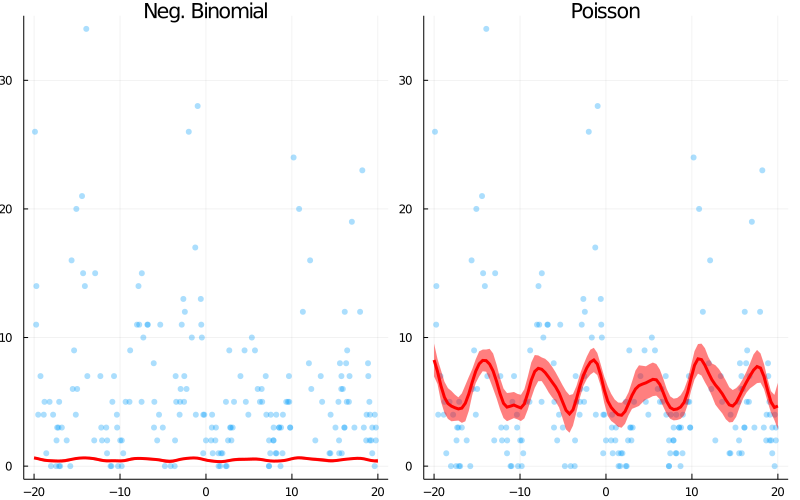

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*